<a href="https://colab.research.google.com/github/DGkurnia/cnkproject/blob/main/BMLP_Derfansyah_Guswiranata_Kurnia_clus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perkenalan Diri
# Nama : Derfansyah Guswiranata Kurnia
# Identitas dicoding : dgkurnia
# Email: weerakurnia@gmail.com

# **1. Perkenalan Dataset**


In [1]:
#Tahap awal inisiasi
!pip install kaggle #instal Kaggle

In [2]:
#instalasi 'json'
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"derfansyahgk","key":"24be196f622b75f71753aee422847c5c"}'}

In [3]:
#kode untuk kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [4]:
#pengunduhan dataset
!kaggle datasets download -d bhavikjikadara/mental-health-dataset

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/1.95M [00:00<?, ?B/s]
100% 1.95M/1.95M [00:00<00:00, 110MB/s]


In [5]:
#ekstraksi
!unzip mental-health-dataset.zip

Archive:  mental-health-dataset.zip
  inflating: Mental Health Dataset.csv  


# **2. Import Perpustakaan (Library)**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [6]:
#Perpustakaan dataset
import numpy as np
import pandas as pd
#Grafik
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Lanjutan instalasi perpustakaan untuk tahap data preprocessing
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [8]:
#inisiasi perpustakaan untuk pelabelan banyak
from sklearn.preprocessing import MultiLabelBinarizer

In [9]:
#Bagian category_encoders
!pip install category_encoders
from category_encoders import LeaveOneOutEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.7 MB/s eta 0:00:00


In [10]:
#Perpustakaan untuk model
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

In [11]:
# Pengabaian peringatan
import warnings
warnings.filterwarnings("ignore")

# **3. Proses Pemuatan Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [12]:
#Pembacaan dataset
mentaldf = pd.read_csv("/content/Mental Health Dataset.csv")
#Penyalinan demi keamanan
mtdfc =  mentaldf.copy()
#Inspeksi mtdfc
mtdfc.head(10)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
8,8/27/2014 12:18,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
9,8/27/2014 12:37,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Info tentang data

In [13]:
#Tahap awal pemeriksaan
mtdfc.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

Ada 18 kolom

In [14]:
#deskripsi data
mtdfc.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


Hasil deskripsi ini menandakan jumlah kolom hilang yang sedikit

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [15]:
#Insoeksi nilai hilang
print('Persentase Nilai Hilang')
(mtdfc.isna().mean() * 100).round(1)

Persentase Nilai Hilang


,0
Timestamp,0.0
Gender,0.0
Country,0.0
Occupation,0.0
self_employed,1.8
family_history,0.0
treatment,0.0
Days_Indoors,0.0
Growing_Stress,0.0
Changes_Habits,0.0


Nilai hilang yang kecil (<2%) memudahkan proses penghapusan data

In [16]:
#Inspeksi nilai duplikat (angka & persentase)
# Niai angka duplikat
print('Total Duplikat: {:,}'.format(mtdfc.duplicated().sum()))

# Nilai persentasi duplikat
print('Persentasi Duplikat: {:.1%}'.format(mtdfc.duplicated().mean()))

Total Duplikat: 2,313
Persentasi Duplikat: 0.8%


In [17]:
#Pembersihan tahap awal (penghapusan)
mtdfc.dropna(inplace=True)

In [18]:
#Tahap pembersihan duplikat
mtdfc.drop_duplicates(inplace = True)
#Pemeriksaan data setelah penghapusan duplikat
print('Amount of duplicates: {:,}'.format(mtdfc.duplicated().sum()))

Amount of duplicates: 0


In [19]:
#inspeksi data numerikal
mtdfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284858 entries, 3 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                284858 non-null  object
 1   Gender                   284858 non-null  object
 2   Country                  284858 non-null  object
 3   Occupation               284858 non-null  object
 4   self_employed            284858 non-null  object
 5   family_history           284858 non-null  object
 6   treatment                284858 non-null  object
 7   Days_Indoors             284858 non-null  object
 8   Growing_Stress           284858 non-null  object
 9   Changes_Habits           284858 non-null  object
 10  Mental_Health_History    284858 non-null  object
 11  Mood_Swings              284858 non-null  object
 12  Coping_Struggles         284858 non-null  object
 13  Work_Interest            284858 non-null  object
 14  Social_Weakness          

Hasil ini aman untuk analisis tahap awal dan pembuatan kluster untuk klasifikasi

## **5b. Inspeksi awal data**

 ### Persentase Argumentasi untuk inspeksi.

 ### Argumen:
      category (str): Kelompok Kategori.

 ### Kumpulan Hasil:
      pandas.DataFrame: Format 'dataframe' untuk inspeksi hasil.


In [20]:
#Persiapan untuk fungsi
def countsplot(category):
  # Create count plot with dynamic title
  plt.figure(figsize = (10, 9))
  sns.countplot(data = mtdfc, x = category)
  plt.ylabel("Count")
  plt.title(f"{category} Distribution")
  plt.show()

  # Calculate counts and percentages
  category_counts = mtdfc[category].value_counts() #Nilai perhitungan
  category_percentages = mtdfc[category].value_counts(normalize = True) #Persentase

  # Combine counts and percentages into a DataFrame
  stats_df = pd.DataFrame({"Count": category_counts, "Proportion": category_percentages})
  stats_df["Count"] = stats_df["Count"].apply("{:,}".format)
  stats_df["Proportion"] = stats_df["Proportion"].apply("{:.1%}".format)

  return stats_df

### Resume inspeksi data

### Aspek jawaban biner

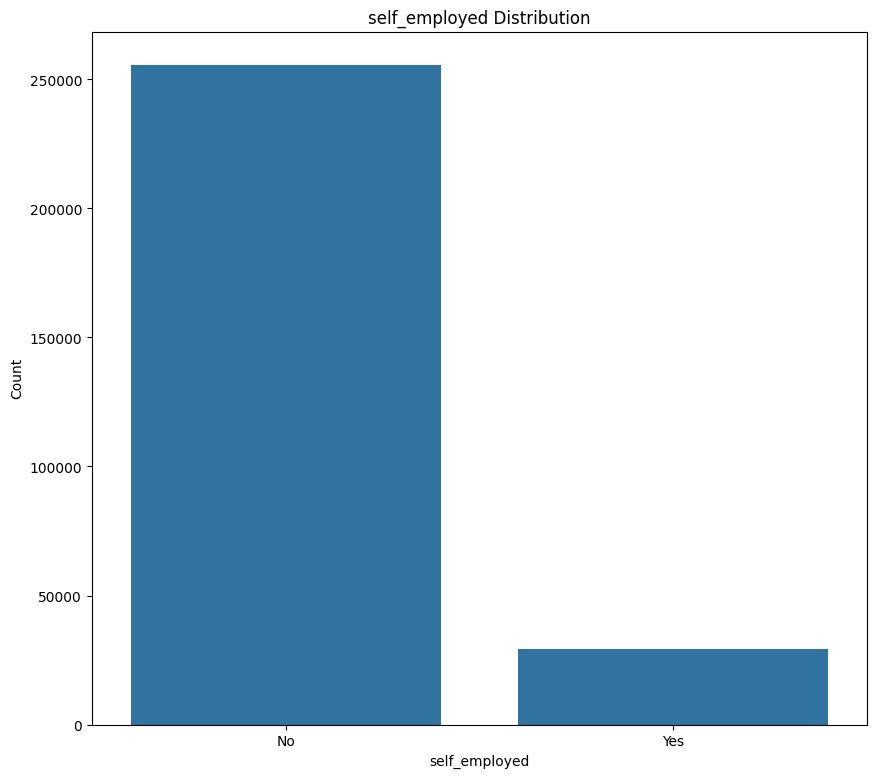

,Count,Proportion
self_employed,,
No,"255,711",89.8%
Yes,"29,147",10.2%


In [21]:
#Lanjutan (kecendrungan stres dari pekerja mandiri)
countsplot("self_employed")

Sebagian besar pegawai adalah pekerja mandiri

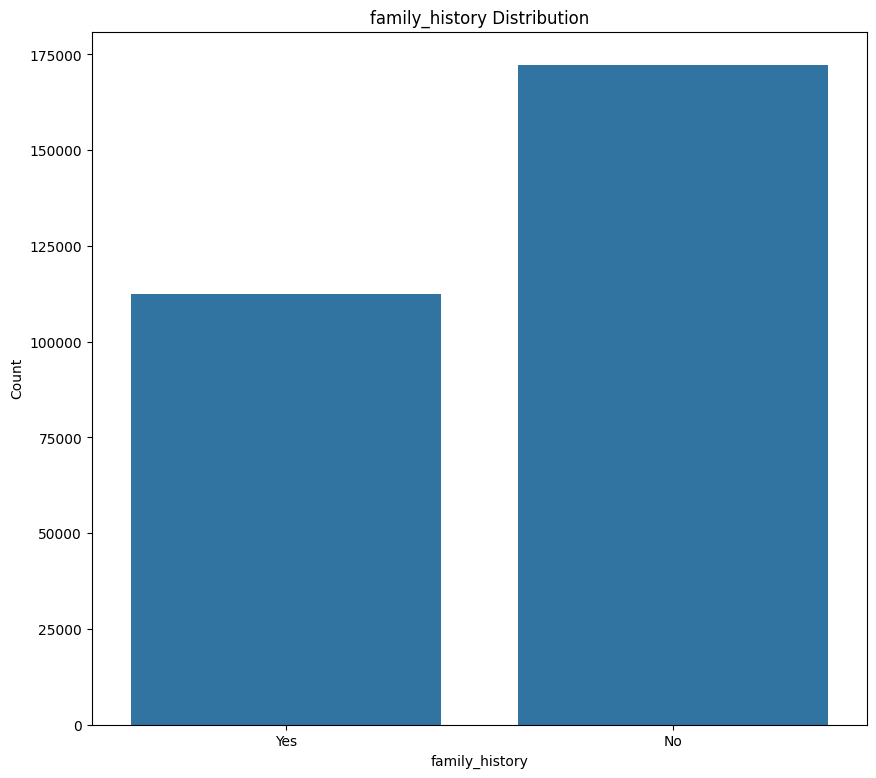

,Count,Proportion
family_history,,
No,"172,357",60.5%
Yes,"112,501",39.5%


In [22]:
#Lanjutan (sejarah keluarga)
countsplot("family_history")

Sebagian penderita tidak memiliki catatan sejarah riwayat

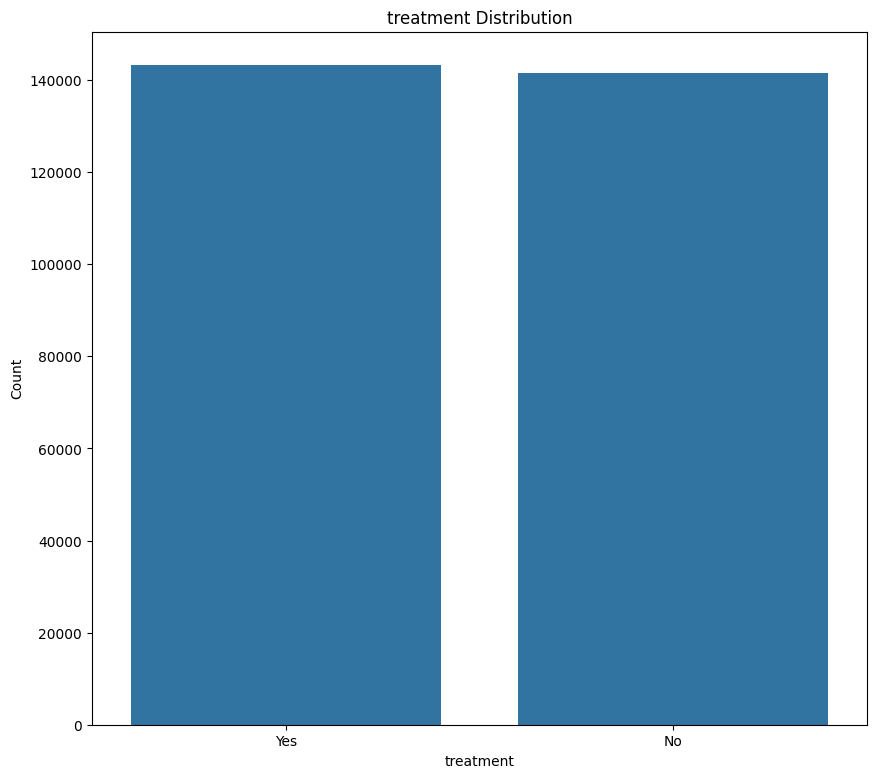

,Count,Proportion
treatment,,
Yes,"143,331",50.3%
No,"141,527",49.7%


In [23]:
#ada perawatan atau tidak
countsplot("treatment")

Rasio antara pernah ada pengobatan dan tidak hampir sama

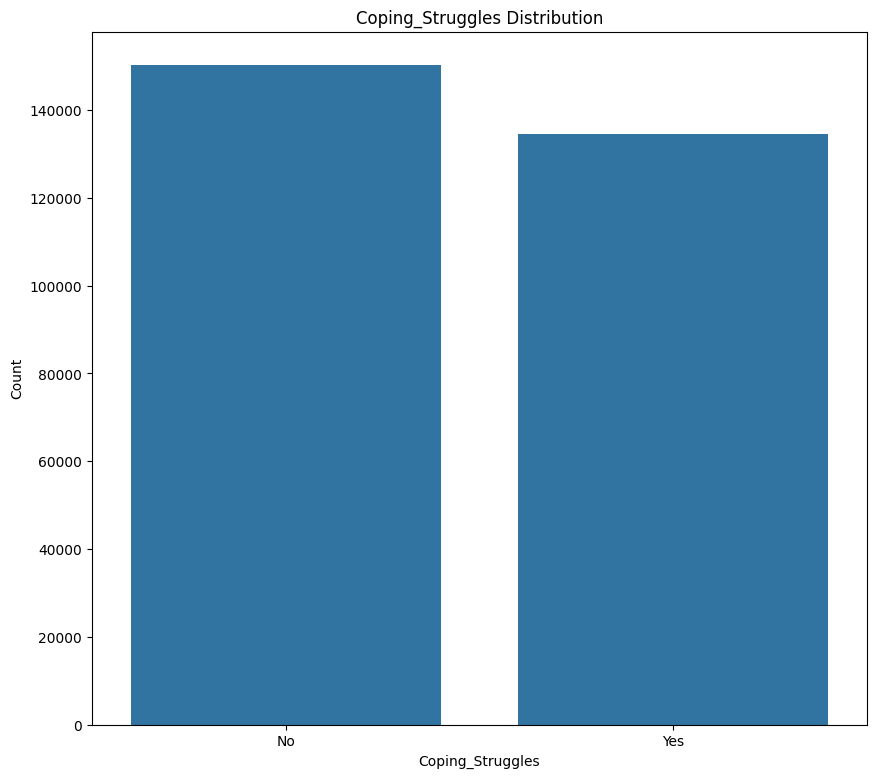

,Count,Proportion
Coping_Struggles,,
No,"150,318",52.8%
Yes,"134,540",47.2%


In [24]:
#kecendrungan untuk mengalami kesusahan untuk perjuangan
countsplot("Coping_Struggles")

Pasien yang sedang berjuang sedikit lebih banyak

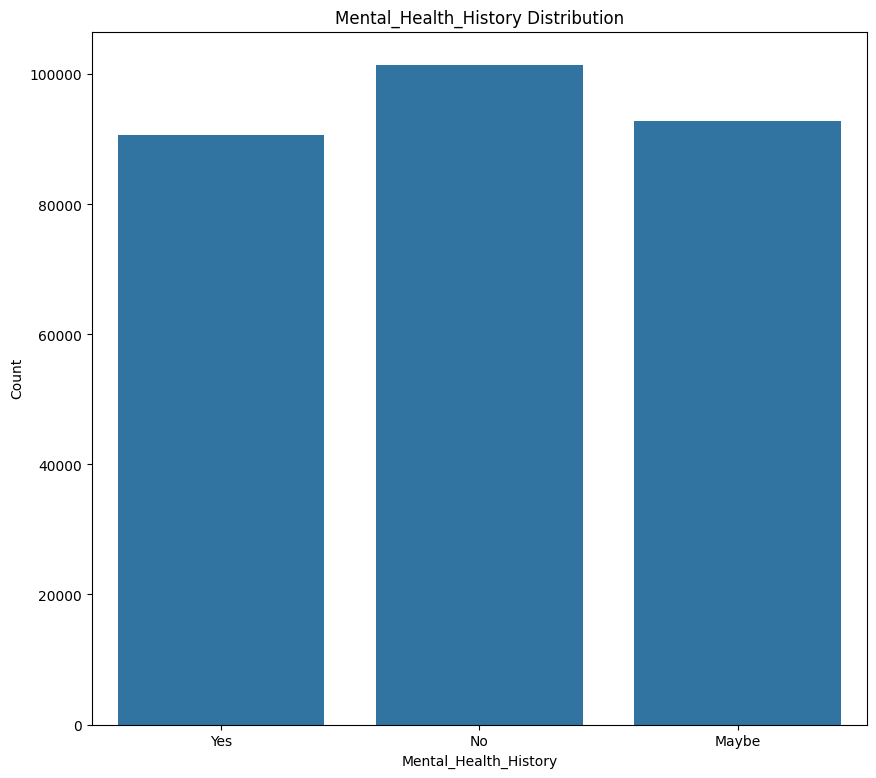

,Count,Proportion
Mental_Health_History,,
No,"101,474",35.6%
Maybe,"92,808",32.6%
Yes,"90,576",31.8%


In [25]:
#Inspeksi riwayat sebelumnya
countsplot("Mental_Health_History")

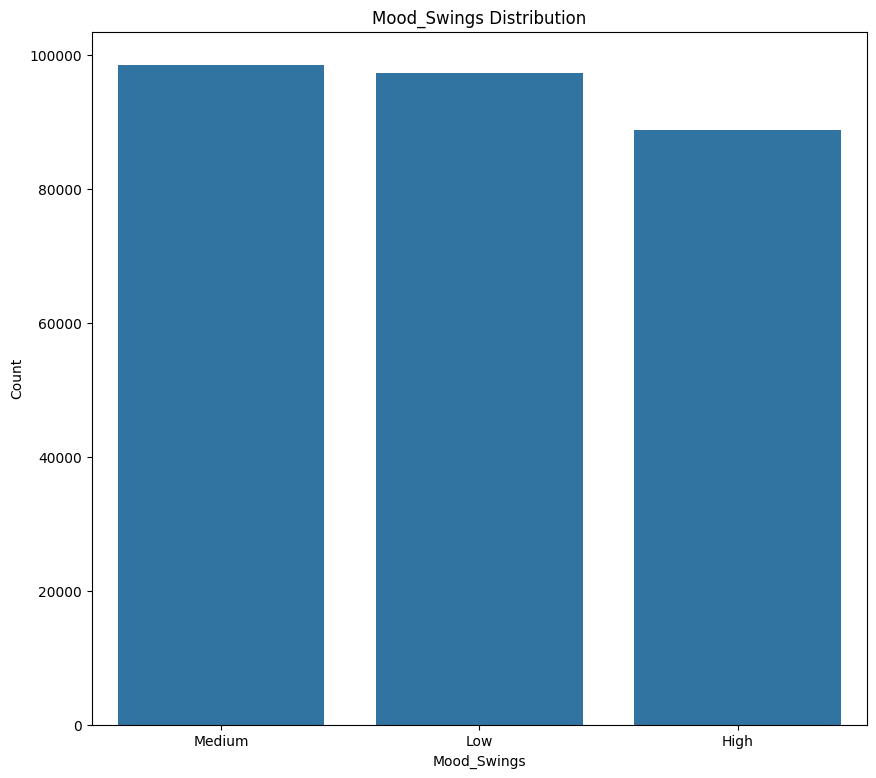

,Count,Proportion
Mood_Swings,,
Medium,"98,592",34.6%
Low,"97,392",34.2%
High,"88,874",31.2%


In [26]:
#kecendrungan untuk mengalami 'pengubahan mood'
countsplot("Mood_Swings")

Hasil medium paling banyak

## Grafik inspeksi

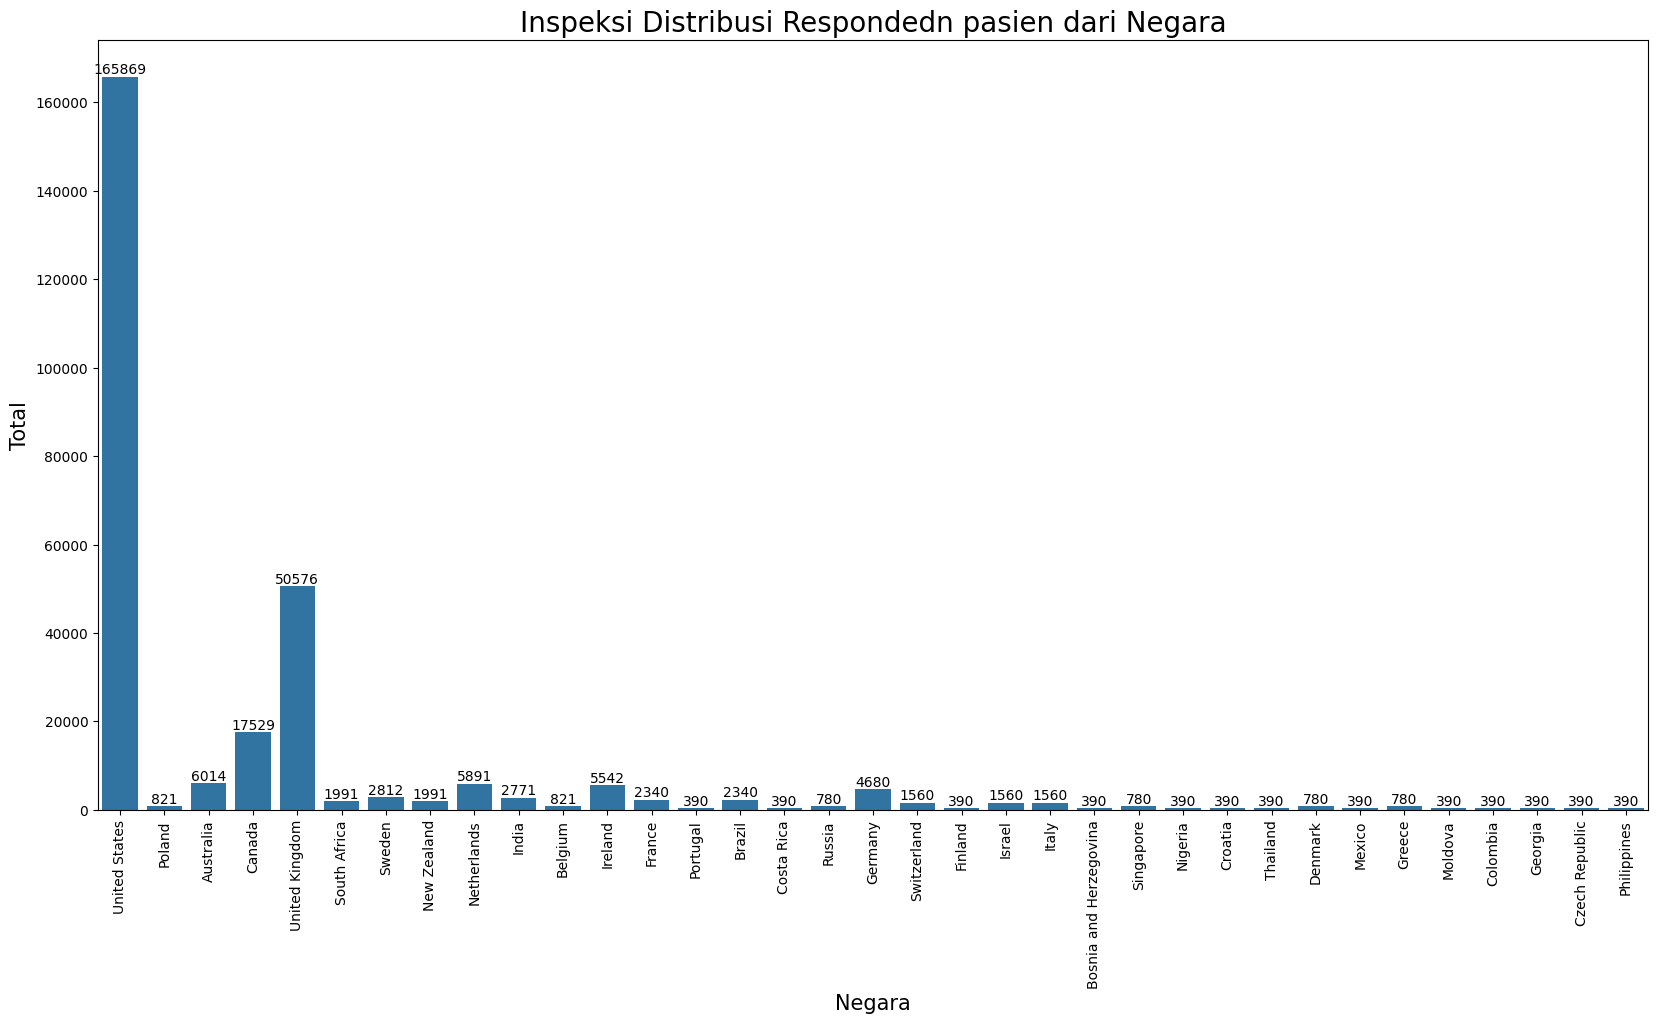

In [28]:
# Model grafik negara
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Country', data=mtdfc)
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
ax.set_title('Inspeksi Distribusi Respondedn pasien dari Negara', fontsize=20)
ax.set_xlabel('Negara', fontsize=15)
ax.set_ylabel('Total', fontsize=15)
ax.grid(False)
plt.show()

Amerika serikat paling dominan

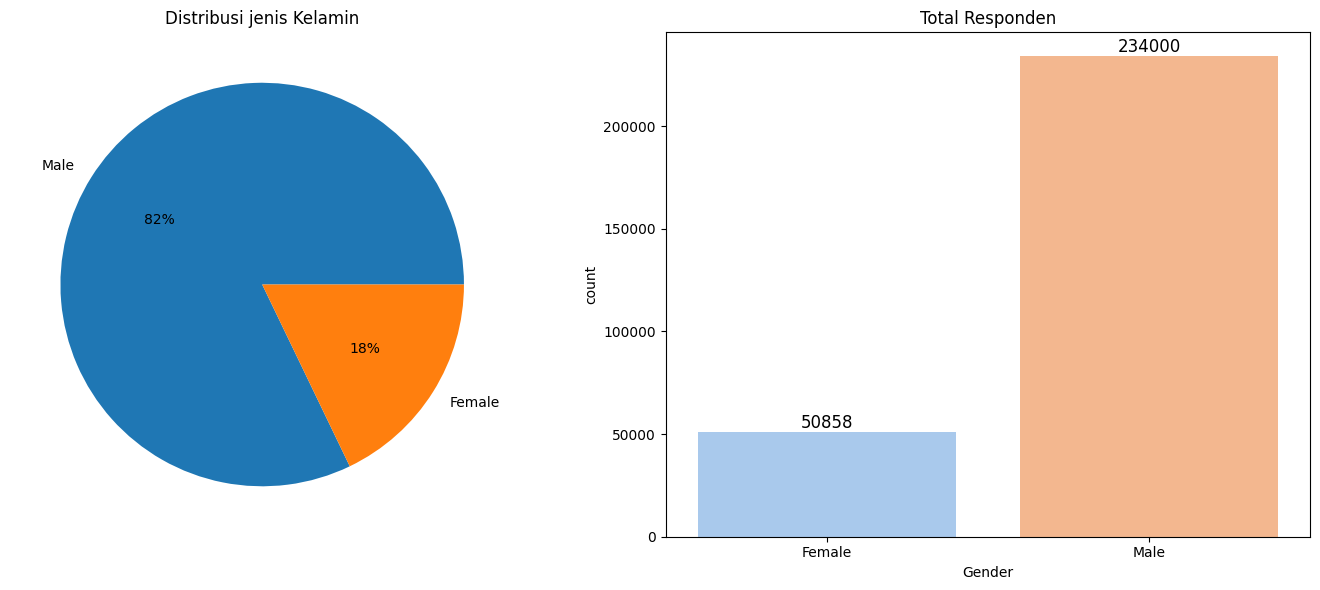

In [29]:
#Inspeksi data jenis kelamin
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(
    mtdfc['Gender'].value_counts(),
    labels=['Male', 'Female'],
    autopct='%.0f%%',
    colors=['#1f77b4', '#ff7f0e']
)
axes[0].set_title('Distribusi jenis Kelamin')

b = sns.countplot(
    x='Gender',
    data=mtdfc,
    ax=axes[1],
    saturation=0.8,
    palette='pastel'
)
for container in b.containers:
    b.bar_label(container, label_type='edge', fontsize=12)
b.set_title('Total Responden')
b.grid(False)

plt.tight_layout()
plt.show()

# **6. Pembangunan Model Clustering**

In [30]:
#Pemilihan kluster dari hasil grafik
[fem,mal] = mtdfc["Gender"].unique().copy()
#print(fem) #Perempuan
#print(mal) #Laki-laki

In [31]:
#Pembagian dataset (wanita dan pria)
selgenf = fem #Wanita
selgenf = mal #Laki-laki
selcol = ["self_employed","family_history","treatment","Coping_Struggles","Mental_Health_History",
          "Social_Weakness", "Growing_Stress","Mood_Swings","Work_Interest","care_options", "Days_Indoors", "Occupation"].copy()
#ke persiapan

### Penyetelan indeks untuk kolom seleksi

In [32]:
#pemilihan kolom untuk analisis
fselcol = mtdfc[mtdfc['Gender'] == fem][selcol].copy() #Pemilihan menjadi kolom wanita
fselcol.reset_index(drop=True, inplace=True)
mselcol = mtdfc[mtdfc['Gender'] == mal][selcol].copy() #Pemilihan menjadi kolom pria
mselcol.reset_index(drop=True, inplace=True)

### Penyetelan indeks untuk kolom utama

In [33]:
#Pemilihan kolom untuk hasil utama
fmtdfc = mtdfc[mtdfc['Gender'] == fem].copy() #Hasil untuk Perempuan
fmtdfc.reset_index(drop=True, inplace=True)
mmtdfc = mtdfc[mtdfc['Gender'] == mal].copy() #Hasil untuk Laki-laki
fmtdfc.reset_index(drop=True, inplace=True)

Hasil memiliki kolom yang sudah ditata ulang

### Pemeriksaan data pilihan

In [34]:
#rincian data wanita (seleksi)
fselcol.head(10)

,self_employed,family_history,treatment,Coping_Struggles,Mental_Health_History,Social_Weakness,Growing_Stress,Mood_Swings,Work_Interest,care_options,Days_Indoors,Occupation
0,No,Yes,Yes,No,Yes,Yes,Yes,Medium,No,Yes,1-14 days,Corporate
1,No,Yes,Yes,No,Yes,Yes,Yes,Medium,No,Yes,1-14 days,Corporate
2,No,No,Yes,No,Yes,Yes,Yes,Medium,No,Not sure,1-14 days,Corporate
3,No,Yes,Yes,No,Yes,Yes,Yes,Medium,No,Not sure,1-14 days,Corporate
4,No,No,No,No,Yes,Yes,Yes,Medium,No,No,1-14 days,Corporate
5,No,No,No,No,Yes,Yes,Yes,Medium,No,Not sure,1-14 days,Corporate
6,No,No,No,No,Yes,Yes,Yes,Medium,No,No,1-14 days,Corporate
7,No,Yes,No,No,Yes,Yes,Yes,Medium,No,Not sure,1-14 days,Corporate
8,No,No,No,No,Yes,Yes,Yes,Medium,No,Not sure,1-14 days,Corporate
9,No,No,No,No,Yes,Yes,Yes,Medium,No,No,1-14 days,Corporate


In [ ]:
#rincian data pria (seleksi)
mselcol.head(10)

,self_employed,family_history,treatment,Coping_Struggles,Mental_Health_History,Social_Weakness,Growing_Stress,Mood_Swings,Work_Interest,care_options,Days_Indoors,Occupation
0,Yes,Yes,No,No,No,Yes,Yes,High,No,No,31-60 days,Others
1,No,Yes,Yes,No,No,Yes,Yes,High,No,Yes,31-60 days,Others
2,No,No,Yes,No,No,Yes,Yes,High,No,Yes,31-60 days,Others
3,No,No,Yes,No,No,Yes,Yes,High,No,No,31-60 days,Others
4,No,No,No,No,No,Yes,Yes,High,No,No,31-60 days,Others
5,No,No,No,No,No,Yes,Yes,High,No,No,31-60 days,Others
6,Yes,Yes,No,No,No,Yes,Yes,High,No,Yes,31-60 days,Others
7,No,Yes,Yes,No,No,Yes,Yes,High,No,Yes,31-60 days,Others
8,No,No,Yes,No,No,Yes,Yes,High,No,Yes,31-60 days,Others
9,No,No,No,No,No,Yes,Yes,High,No,No,31-60 days,Others


### Pemeriksaan data utama

In [ ]:
#wanita
fmtdfc.head(10)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
1,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
2,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
3,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
4,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
5,8/27/2014 12:18,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
6,8/27/2014 12:37,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
7,8/27/2014 12:39,Female,United States,Corporate,No,Yes,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
8,8/27/2014 12:40,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
9,8/27/2014 12:49,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [ ]:
#pria
mmtdfc.head(10)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
52524,8/27/2014 11:35,Male,France,Others,Yes,Yes,No,31-60 days,Yes,Maybe,No,High,No,No,Yes,Maybe,No
52525,8/27/2014 11:35,Male,United States,Others,No,Yes,Yes,31-60 days,Yes,Maybe,No,High,No,No,Yes,No,Yes
52526,8/27/2014 11:35,Male,United States,Others,No,No,Yes,31-60 days,Yes,Maybe,No,High,No,No,Yes,No,Yes
52527,8/27/2014 11:36,Male,United States,Others,No,No,Yes,31-60 days,Yes,Maybe,No,High,No,No,Yes,No,No
52528,8/27/2014 11:38,Male,United Kingdom,Others,No,No,No,31-60 days,Yes,Maybe,No,High,No,No,Yes,No,No
52529,8/27/2014 11:39,Male,United Kingdom,Others,No,No,No,31-60 days,Yes,Maybe,No,High,No,No,Yes,No,No
52530,8/27/2014 11:38,Male,United States,Others,Yes,Yes,No,31-60 days,Yes,Maybe,No,High,No,No,Yes,No,Yes
52531,8/27/2014 11:39,Male,United States,Others,No,Yes,Yes,31-60 days,Yes,Maybe,No,High,No,No,Yes,Maybe,Yes
52532,8/27/2014 11:41,Male,United States,Others,No,No,Yes,31-60 days,Yes,Maybe,No,High,No,No,Yes,Maybe,Yes
52533,8/27/2014 11:41,Male,Canada,Others,No,No,No,31-60 days,Yes,Maybe,No,High,No,No,Yes,No,No


## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

## Klasifikasi hasil data
### Data dengan dua Jawaban
* "self_employed"
* "family_history"
* "treatment"
* "Coping_Struggles"


### Kolom dengan tiga jawaban
* "Mental_Health_History"
* "Growing_Stress"
* "Mood_Swings"
* "Work_Interest"
* "care_options"

### Kolom dengan lima jawaban
* "Days_Indoors"
* "Occupation"

Tujuan utama dari pemisahan encoding adalah mempermudah proses kluster



### Persiapan clustering (fitting)

In [ ]:
#Penyatuan untuk dua jawaban
ftwcol = ["self_employed","family_history","treatment","Coping_Struggles"] #wanita
mtwcol = ["self_employed","family_history","treatment","Coping_Struggles"] #pria

In [ ]:
#Penyatuan untuk tiga jawaban
fthcol = ["Mental_Health_History","Growing_Stress","Mood_Swings", "Work_Interest", "care_options"] #Wanita
mthcol = ["Mental_Health_History","Growing_Stress","Mood_Swings", "Work_Interest", "care_options"] #Pria

In [ ]:
#Hasil untuk lima Jawaban
fficol = ["Days_Indoors","Occupation"] #Wanita
mficol = ["Days_Indoors","Occupation"] #Pria

In [ ]:
#proses 'penyesuaian' (inisiasi)
le = LabelEncoder()
mlb = MultiLabelBinarizer()
#ke eksekusi

In [ ]:
#pemilihan kolom bedasarkan jenis (dua jawaban)
ftwcol = fselcol[ftwcol].copy() #Wanita
mtwcol = mselcol[mtwcol].copy() #Pria
#tiga jawaban
fthcol = fselcol[fthcol].copy() #Wanita
mthcol = mselcol[mthcol].copy() #Pria
#lima jawaban
fficol = fselcol[fficol].copy() #Wanita
mficol = mselcol[mficol].copy() #Pria

In [ ]:
#pelabelan untuk dua jawaban
for column in ftwcol.columns:
    ftwcol[column] = le.fit_transform(ftwcol[column])

# Untuk Pria
for column in mtwcol.columns:
    mtwcol[column] = le.fit_transform(mtwcol[column])

In [ ]:
#eksekusi mlb untuk tiga jawaban
for column in fthcol.columns:
    fthcol[column] = mlb.fit_transform(fthcol[column]) # Convert to list of lists
# Untuk Pria
for column in fthcol.columns:
    mthcol[column] = mlb.fit_transform(mthcol[column]) # Convert to list of lists

In [ ]:
#eksekusi mlb untuk lima jawaban
for column in fficol.columns:
    fficol[column] = mlb.fit_transform(fficol[column]) # Convert to list of lists
# Untuk Pria
for column in fficol.columns:
    mficol[column] = mlb.fit_transform(mficol[column]) # Convert to list of lists

In [ ]:
#proses konversi ke Dataframe
#dua jawaban
ftwcol = pd.DataFrame(ftwcol)
mtwcol = pd.DataFrame(mtwcol)
#tiga jawaban
fthcol = pd.DataFrame(fthcol)
mthcol = pd.DataFrame(mthcol)
#lima jawaban
fficol = pd.DataFrame(fficol)
mficol = pd.DataFrame(mficol)

### Inspeksi Hasil cluster

In [ ]:
#inspeksi hasil (wanita)
ftwcol.head(7)

In [ ]:
#inspeksi hasil (pria)
mtwcol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234000 entries, 0 to 233999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   self_employed     234000 non-null  int64
 1   family_history    234000 non-null  int64
 2   treatment         234000 non-null  int64
 3   Coping_Struggles  234000 non-null  int64
dtypes: int64(4)
memory usage: 7.1 MB


In [ ]:
#tiga jawaban
fthcol.info() #wanita
#ke pria

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50858 entries, 0 to 50857
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Mental_Health_History  50858 non-null  int64
 1   Growing_Stress         50858 non-null  int64
 2   Mood_Swings            50858 non-null  int64
 3   Work_Interest          50858 non-null  int64
 4   care_options           50858 non-null  int64
dtypes: int64(5)
memory usage: 1.9 MB


In [ ]:
#pria (tiga jawaban)
mthcol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234000 entries, 0 to 233999
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Mental_Health_History  234000 non-null  int64
 1   Growing_Stress         234000 non-null  int64
 2   Mood_Swings            234000 non-null  int64
 3   Work_Interest          234000 non-null  int64
 4   care_options           234000 non-null  int64
dtypes: int64(5)
memory usage: 8.9 MB


In [ ]:
#lima jawaban (wanita)
fficol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50858 entries, 0 to 50857
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Days_Indoors  50858 non-null  int64
 1   Occupation    50858 non-null  int64
dtypes: int64(2)
memory usage: 794.8 KB


In [ ]:
#lima jawaban (pria)
mficol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234000 entries, 0 to 233999
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Days_Indoors  234000 non-null  int64
 1   Occupation    234000 non-null  int64
dtypes: int64(2)
memory usage: 3.6 MB


### Penyatuan Hasil

In [ ]:
#proses penyatuan data untuk wanita
fcldf = pd.concat([ftwcol, fthcol, fficol], axis=1)

#proses penyatuan data untuk pria
mcldf = pd.concat([mtwcol, mthcol,mficol], axis=1)

In [ ]:
#Inspeksi hasil penyatuan
fcldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50858 entries, 0 to 50857
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   self_employed          50858 non-null  int64
 1   family_history         50858 non-null  int64
 2   treatment              50858 non-null  int64
 3   Coping_Struggles       50858 non-null  int64
 4   Mental_Health_History  50858 non-null  int64
 5   Growing_Stress         50858 non-null  int64
 6   Mood_Swings            50858 non-null  int64
 7   Work_Interest          50858 non-null  int64
 8   care_options           50858 non-null  int64
 9   Days_Indoors           50858 non-null  int64
 10  Occupation             50858 non-null  int64
dtypes: int64(11)
memory usage: 4.3 MB


In [ ]:
#data pria
mcldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234000 entries, 0 to 233999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   self_employed          234000 non-null  int64
 1   family_history         234000 non-null  int64
 2   treatment              234000 non-null  int64
 3   Coping_Struggles       234000 non-null  int64
 4   Mental_Health_History  234000 non-null  int64
 5   Growing_Stress         234000 non-null  int64
 6   Mood_Swings            234000 non-null  int64
 7   Work_Interest          234000 non-null  int64
 8   care_options           234000 non-null  int64
 9   Days_Indoors           234000 non-null  int64
 10  Occupation             234000 non-null  int64
dtypes: int64(11)
memory usage: 19.6 MB


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Metode Sikut (Elbow Method) untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Inisiasi perpustakaan (untuk pelaksanaan K-means)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#metrik
from sklearn import metrics
from sklearn.metrics import silhouette_score
#deteksi jarak dan penilaian
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance

### Persiapan cluster
#### 1. Penerapan model DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

#### 2. Eksekusi DBSCAN untuk dua dataset

In [ ]:
#Persiapan model kluster (wanita dan pria)
scaler = StandardScaler()
fscaled = scaler.fit_transform(fcldf).copy() #wanita
mscaled = scaler.fit_transform(mcldf).copy() #pria

In [ ]:
#inspeksi hasil
fscaled

array([[-0.2511236 ,  0.81361651,  0.6758625 , ..., -0.68920244,
         2.21452243, -0.47374235],
       [-0.2511236 ,  0.81361651,  0.6758625 , ..., -0.68920244,
         2.21452243, -0.47374235],
       [-0.2511236 , -1.22908027,  0.6758625 , ...,  1.4509525 ,
         2.21452243, -0.47374235],
       ...,
       [-0.2511236 ,  0.81361651, -1.47959089, ..., -0.68920244,
        -0.45156463, -0.47374235],
       [-0.2511236 ,  0.81361651,  0.6758625 , ..., -0.68920244,
        -0.45156463, -0.47374235],
       [-0.2511236 ,  0.81361651,  0.6758625 , ..., -0.68920244,
        -0.45156463, -0.47374235]])

In [ ]:
#eksekusi Kmeans di dataset wanita
def apply_kmeans_until_min_silhouette(data, min_silhouette_score=0.55, max_clusters=15, n_random_states=30):
    n_clusters = 2  # Start from 2
    best_labels = None
    best_silhouette_score = 0

    while n_clusters <= max_clusters:
        for random_state in range(n_random_states):
            kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
            kmeans.fit(data)
            labels = kmeans.labels_
            silhouette_avg = np.round(silhouette_score(data, labels),3)

            print(f"Trying {n_clusters} clusters with random state {random_state}: Silhouette Score = {silhouette_avg}")

            if silhouette_avg >= min_silhouette_score:
                best_labels = labels
                best_silhouette_score = silhouette_avg
                break  # Exit if silhouette score is satisfactory

        if best_labels is not None:
            print(f"Optimal number of clusters: {n_clusters} with Silhouette Score: {best_silhouette_score}")
            break  # Exit the outer loop if we found a suitable score

        n_clusters += 1  # Increment the number of clusters
        n_random_states +=2

    if best_labels is None:
        print("No suitable cluster count found within the specified range.")

    return best_labels, best_silhouette_score

#cek hasil kluster
labels, silhouette_avg, optimal_n_clusters = apply_kmeans_until_min_silhouette(fscaled, min_silhouette_score=0.55)
print(f"Silhouette Score: {silhouette_avg}")

Trying 2 clusters with random state 0: Silhouette Score = 0.337
Trying 2 clusters with random state 1: Silhouette Score = 0.337
Trying 2 clusters with random state 2: Silhouette Score = 0.337


In [ ]:
#inspeksi dataset pria
def apply_kmeans_until_min_silhouette(data, min_silhouette_score=0.55, max_clusters=15, n_random_states=30):
    n_clusters = 2  # Start from 2
    best_labels = None
    best_silhouette_score = 0

    while n_clusters <= max_clusters:
        for random_state in range(n_random_states):
            kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
            kmeans.fit(data)
            labels = kmeans.labels_
            silhouette_avg = np.round(silhouette_score(data, labels),3)

            print(f"Trying {n_clusters} clusters with random state {random_state}: Silhouette Score = {silhouette_avg}")

            if silhouette_avg >= min_silhouette_score:
                best_labels = labels
                best_silhouette_score = silhouette_avg
                break  # Exit if silhouette score is satisfactory

        if best_labels is not None:
            print(f"Optimal number of clusters: {n_clusters} with Silhouette Score: {best_silhouette_score}")
            break  # Exit the outer loop if we found a suitable score

        n_clusters += 1  # Increment the number of clusters

    if best_labels is None:
        print("No suitable cluster count found within the specified range.")

    return best_labels, best_silhouette_score

#cek hasil kluster
labels, silhouette_avg, optimal_n_clusters = apply_kmeans_until_min_silhouette(mscaled, min_silhouette_score=0.55)
print(f"Silhouette Score: {silhouette_avg}")

##### Hasil kluster
dataset wanita:
dataset pria

In [ ]:
#fungsi pemanggilan model sikut
def elbow_method(data, max_clusters=11):
    inertia = []

    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)  # Append inertia for each cluster count

    # Plotting the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.xticks(range(1, max_clusters + 1))
    plt.grid()
    plt.axvline(x=optimal_n_clusters, color='r', linestyle='--', label='Optimal Clusters')
    plt.legend()
    plt.show()


In [ ]:
#cek hasil (wanita)
elbow_method(fscaled, max_clusters=11)

In [ ]:
#cek hasil (pria)
elbow_method(mscaled, max_clusters=11)

In [ ]:
#Inspeksi melalui metode penilaian siluet (fungsi)
from sklearn.metrics import silhouette_samples
#ke eksekusi

In [ ]:
#eksekusi fungsi
def visualize_clusters(data, labels):
    # Create a scatter plot of the clusters
    plt.figure(figsize=(10, 6))

    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(data[labels == label, 0], data[labels == label, 1], label=f'Cluster {label}')

    plt.title('KMeans Clustering Result')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

    # Calculate silhouette scores for each sample
    silhouette_vals = silhouette_samples(data, labels)

    # Create a subplot for the silhouette scores
    plt.figure(figsize=(10, 6))
    y_lower = 10  # Starting position for the first cluster's scores

    for i in unique_labels:
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = silhouette_vals[labels == i]

        # Sort the values to plot them in order
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]

        # Plotting the silhouette scores for each cluster
        plt.barh(np.arange(y_lower, y_lower + size_cluster_i),
                 ith_cluster_silhouette_values,
                 height=5)

        # Labeling the y-axis with cluster numbers
        plt.text(-0.05, y_lower + size_cluster_i / 2, f'Cluster {i}')

        # Update the starting position for the next cluster's scores
        y_lower += size_cluster_i

    plt.title('Inspeksi hasil siluet')
    plt.xlabel('Nilai siluet')
    plt.ylabel('Label')
    plt.axvline(x=0.55, color='red', linestyle='--', label='Deklarasi')
    plt.legend()
    plt.show()

In [ ]:
#cek hasil (wanita)
if labels is not None:
    visualize_clusters(fscaled, labels)

In [ ]:
#cek hasil (pria)
if labels is not None:
    visualize_clusters(mscaled, labels)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Modifikasi dengan 'Feature Selection'


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Hasil visualisasi


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.